In [1]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Coffee Shop Sales.xlsx")
df.head()



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


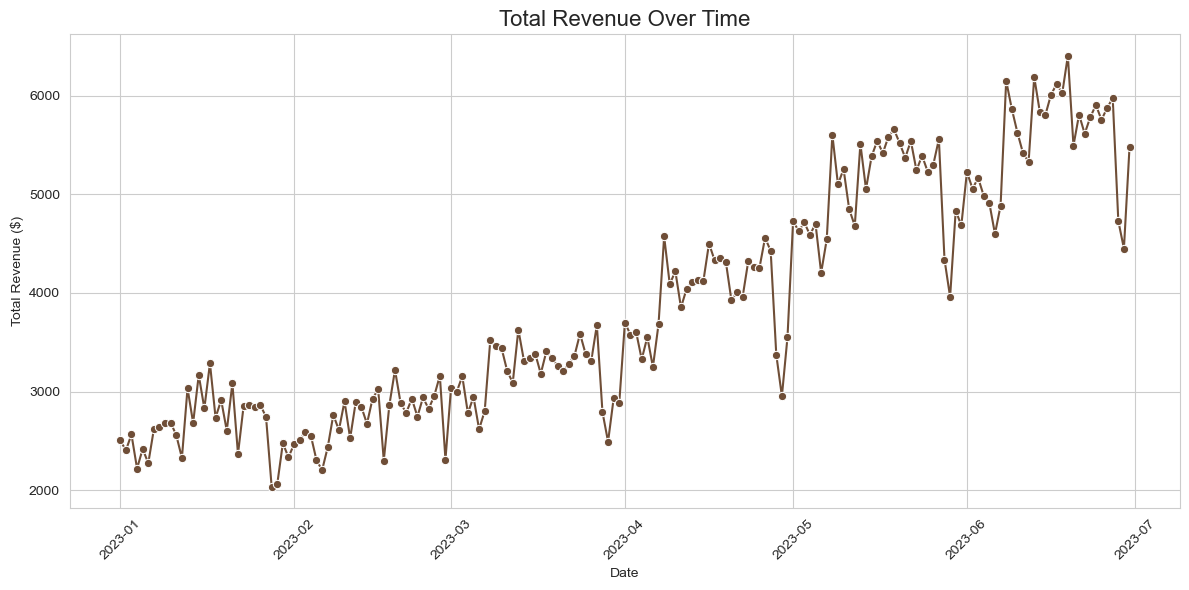

In [2]:
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

revenue_over_time = df.groupby('transaction_date')['total_revenue'].sum().reset_index()



sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_over_time, x='transaction_date', y='total_revenue', marker='o', color='#6F4E37')
plt.title('Total Revenue Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\amras\AppData\Local\Temp\ipykernel_7104\1124563371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='total_revenue', y='product_detail', palette='copper')


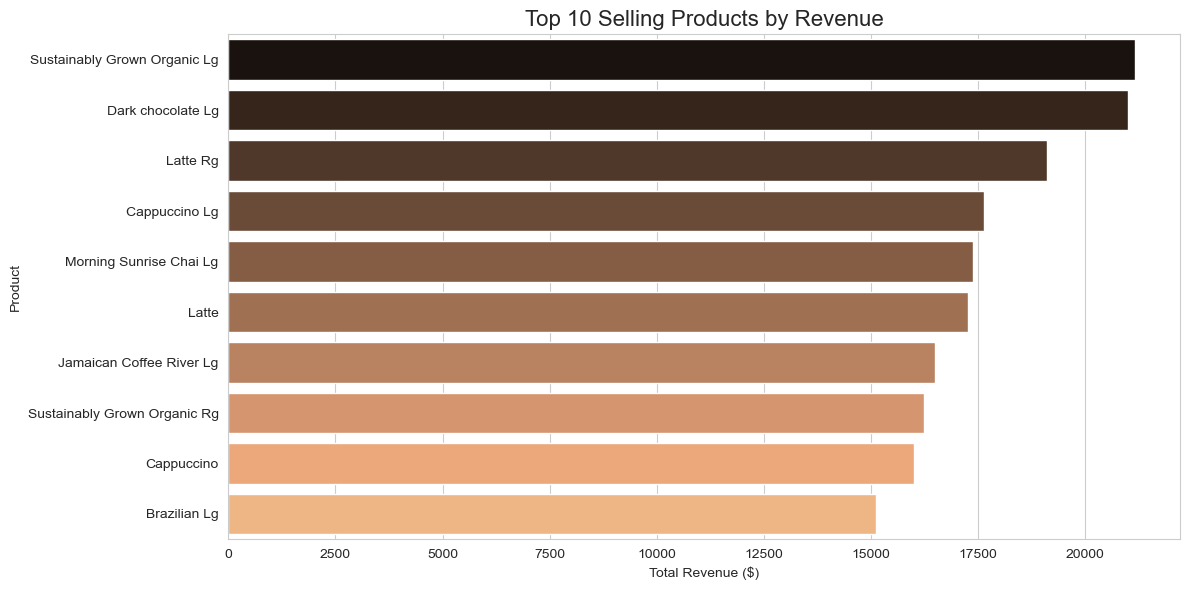

In [3]:
top_products = df.groupby('product_detail')['total_revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='total_revenue', y='product_detail', palette='copper')
plt.title('Top 10 Selling Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

C:\Users\amras\AppData\Local\Temp\ipykernel_7104\66831018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_sales, x='store_location', y='total_revenue', palette='YlOrBr')


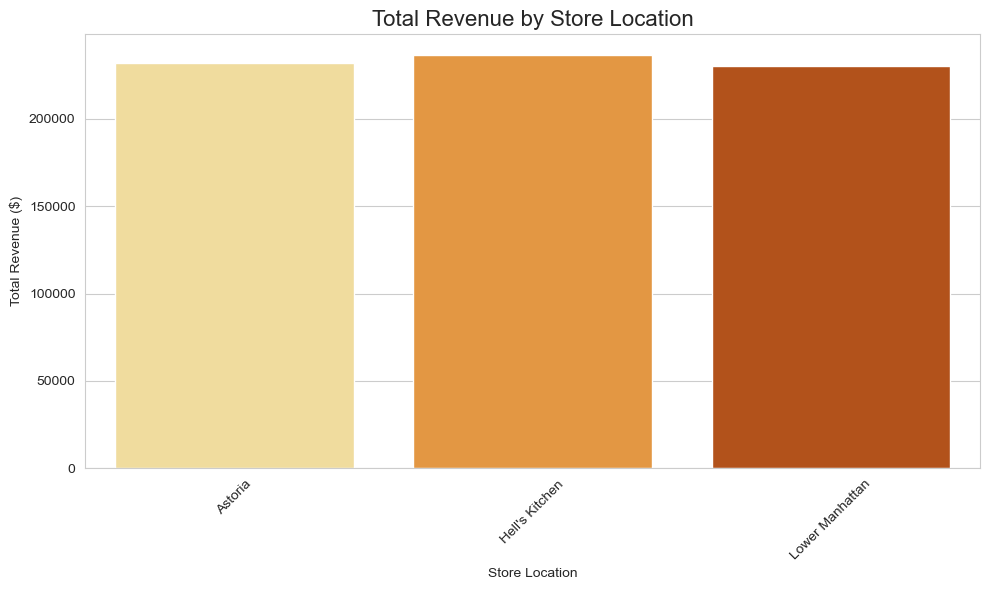

In [6]:
location_sales = df.groupby('store_location')['total_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=location_sales, x='store_location', y='total_revenue', palette='YlOrBr')
plt.title('Total Revenue by Store Location', fontsize=16)
plt.xlabel('Store Location')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

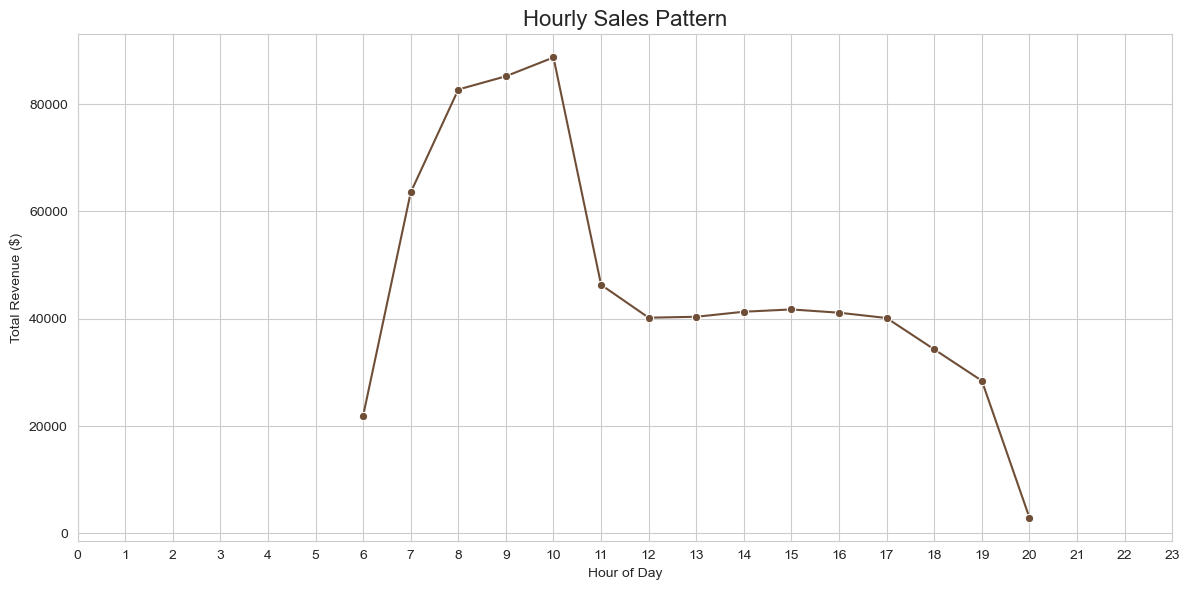

In [8]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df['transaction_hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour
# Group by hour
hourly_sales = df.groupby('transaction_hour')['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x='transaction_hour', y='total_revenue', marker='o', color='#6F4E37')
plt.title('Hourly Sales Pattern', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

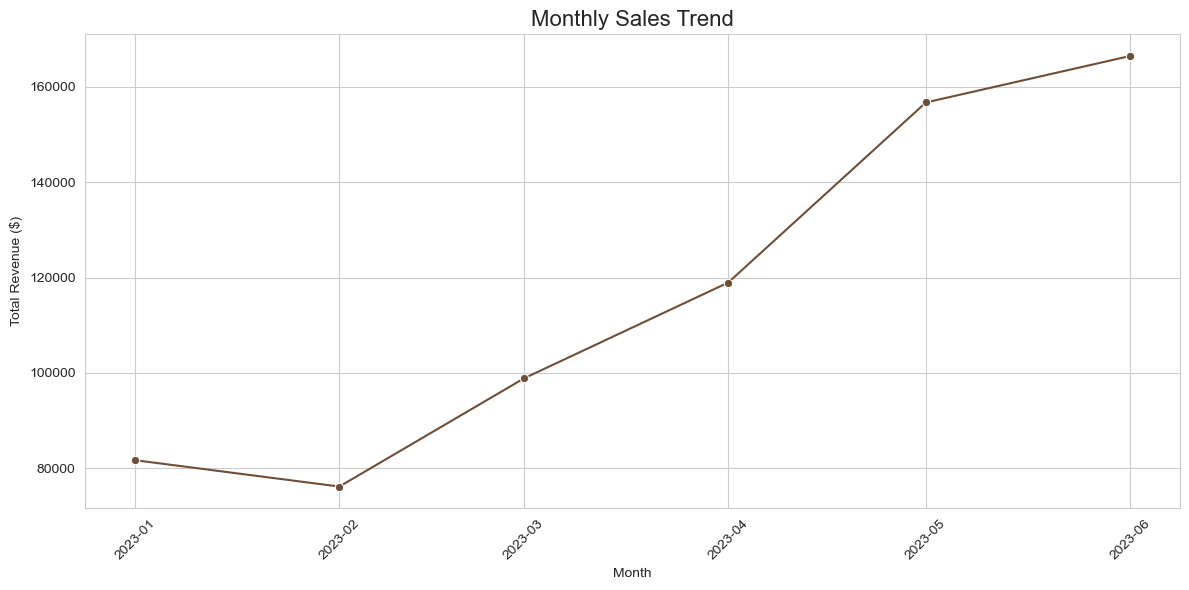

In [9]:
monthly_sales = df.groupby(df['transaction_date'].dt.to_period('M'))['total_revenue'].sum().reset_index()
monthly_sales['transaction_date'] = monthly_sales['transaction_date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='transaction_date', y='total_revenue', marker='o', color='#6F4E37')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

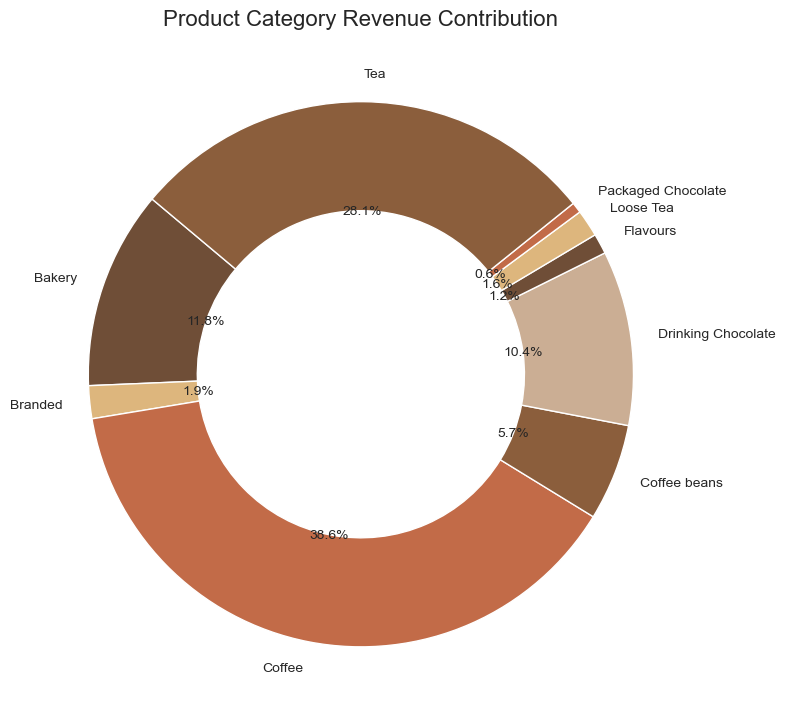

In [10]:
category_sales = df.groupby('product_category')['total_revenue'].sum().reset_index()


plt.figure(figsize=(8, 8))
colors = ['#6F4E37', '#DDB67D', '#C26B48', '#8B5E3C', '#CBAE94']  # Adjust based on categories
plt.pie(
    category_sales['total_revenue'],
    labels=category_sales['product_category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.4}  # Donut hole
)
plt.title('Product Category Revenue Contribution', fontsize=16)
plt.tight_layout()
plt.show()

📦 Average Revenue per Transaction: $4.69


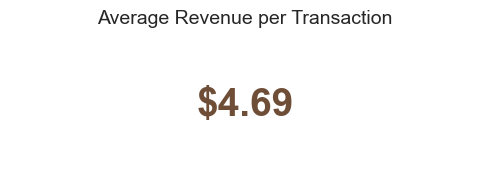

In [11]:
revenue_per_transaction = df.groupby('transaction_id')['total_revenue'].sum()
avg_revenue_per_transaction = revenue_per_transaction.mean()

print(f"📦 Average Revenue per Transaction: ${avg_revenue_per_transaction:.2f}")
# Optional KPI Card Style Display using a plot
plt.figure(figsize=(5, 2))
plt.text(0.5, 0.5, f"${avg_revenue_per_transaction:.2f}", fontsize=28, fontweight='bold',
        ha='center', va='center', color='#6F4E37')
plt.title("Average Revenue per Transaction", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

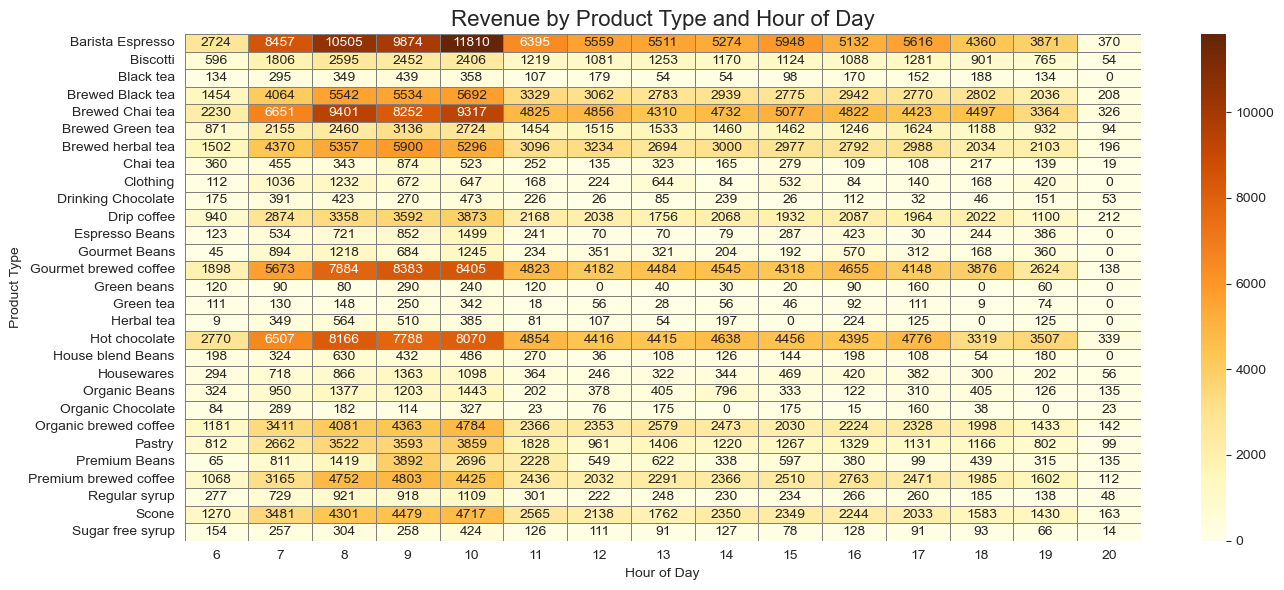

In [12]:
heatmap_data = (
    df.groupby(['product_type', 'transaction_hour'])['total_revenue']
    .sum()
    .reset_index()
    .pivot(index='product_type', columns='transaction_hour', values='total_revenue')
    .fillna(0)
)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5, linecolor='gray', annot=True, fmt=".0f")
plt.title('Revenue by Product Type and Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()

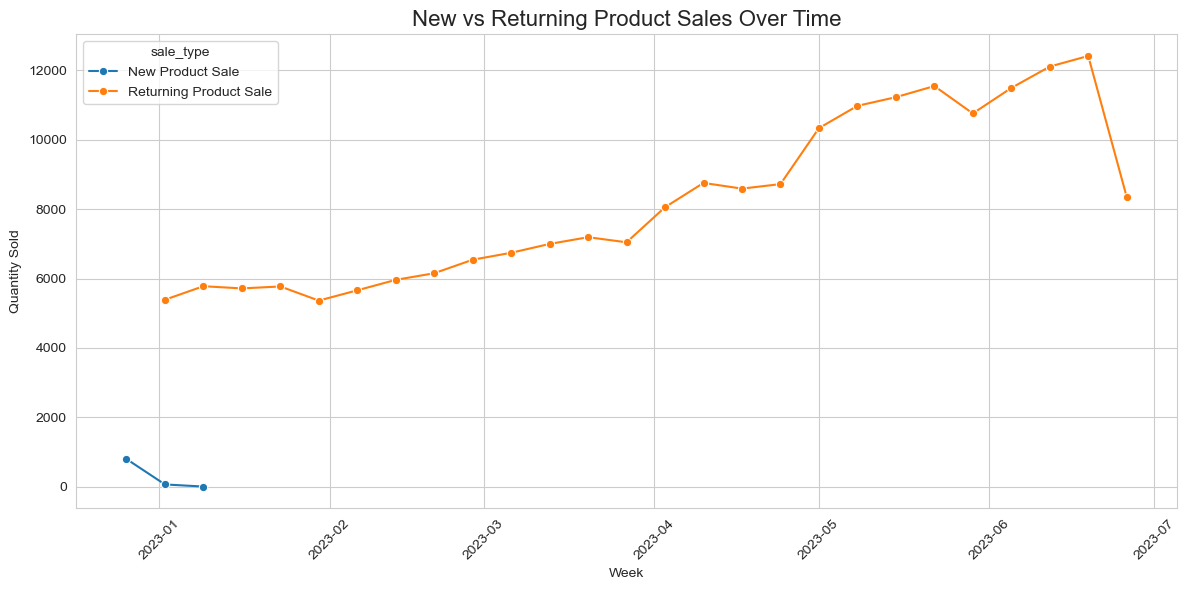

In [ ]:
df = df.sort_values('transaction_date')

# Create helper column: first time each product_detail appeared
first_sold = df.groupby('product_detail')['transaction_date'].min().reset_index()
first_sold.columns = ['product_detail', 'first_sale_date']

# Merge back to main DataFrame
df = df.merge(first_sold, on='product_detail', how='left')

# Define new vs returning flag
df['sale_type'] = df.apply(
    lambda row: 'New Product Sale' if row['transaction_date'] == row['first_sale_date'] else 'Returning Product Sale',
    axis=1
)

# Group by week and sale type
df['week'] = df['transaction_date'].dt.to_period('W').dt.start_time
sales_type_trend = df.groupby(['week', 'sale_type'])['transaction_qty'].sum().reset_index()

# Plot line chart
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_type_trend, x='week', y='transaction_qty', hue='sale_type', marker='o')
plt.title('New vs Returning Product Sales Over Time', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df.head()
df.to_excel("Coffeshop_cleaned.xlsx",index=False)